In [13]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#importing the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
crop.shape

(2200, 8)

In [16]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
#checking for null values
data.isnull().sum().any()

False

In [18]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2200 

column Name :  HUMIDITY
No. of unique values : 2200 

column Name :  PH
No. of unique values : 2200 

column Name :  RAINFALL
No. of unique values : 2200 

column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [19]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [21]:
data.Encoded_label

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Encoded_label, Length: 2200, dtype: int32

In [22]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [23]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [24]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [25]:
#dropping duplicate values
data = data.drop_duplicates()

In [27]:
data.shape

(2200, 9)

<AxesSubplot:>

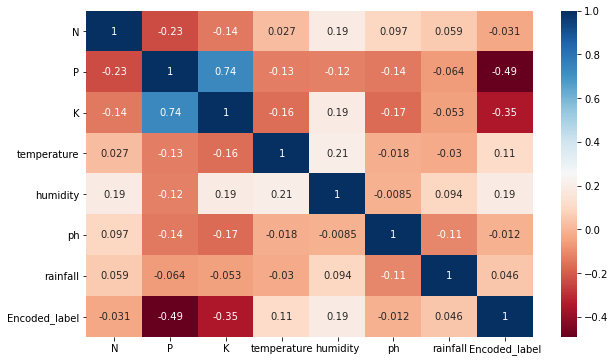

In [28]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

In [30]:
#From the above diagram, the variable 'K' and 'P' have high positive corelation

# Exploratory Data Analysis

In [32]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


# Outlier Detection

Variable Name : N


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


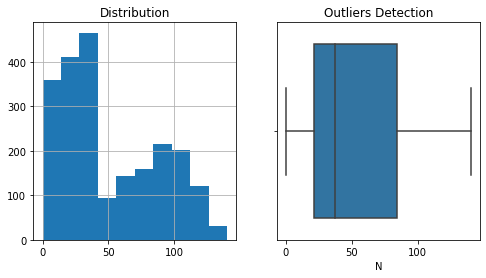



Variable Name : P


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


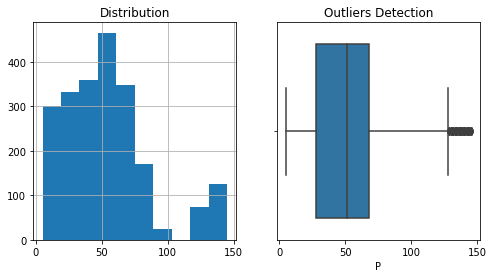



Variable Name : K


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


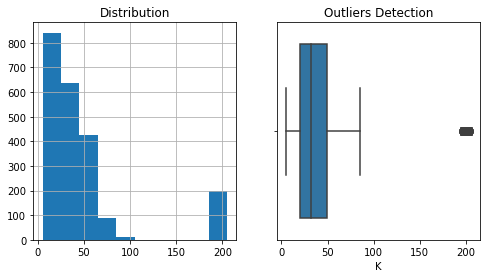



Variable Name : TEMPERATURE


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


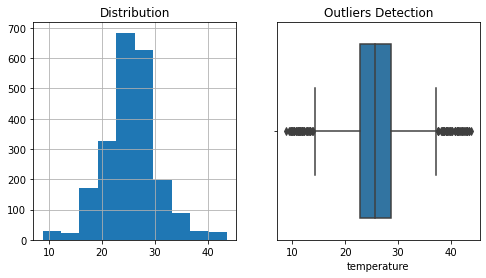



Variable Name : HUMIDITY


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


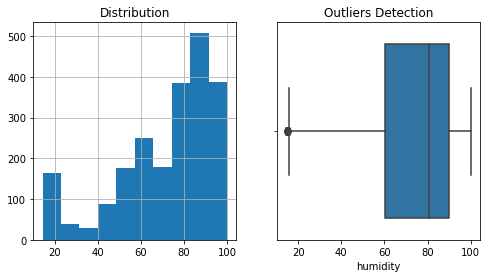



Variable Name : PH


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


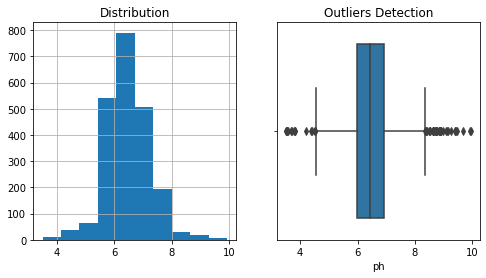



Variable Name : RAINFALL


C:\Users\rajeevramesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


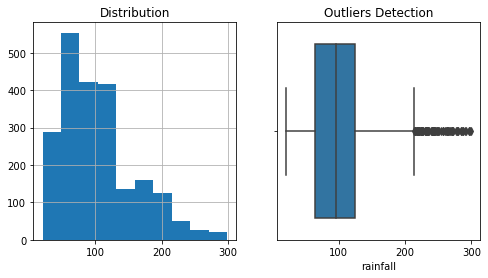

In [33]:
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


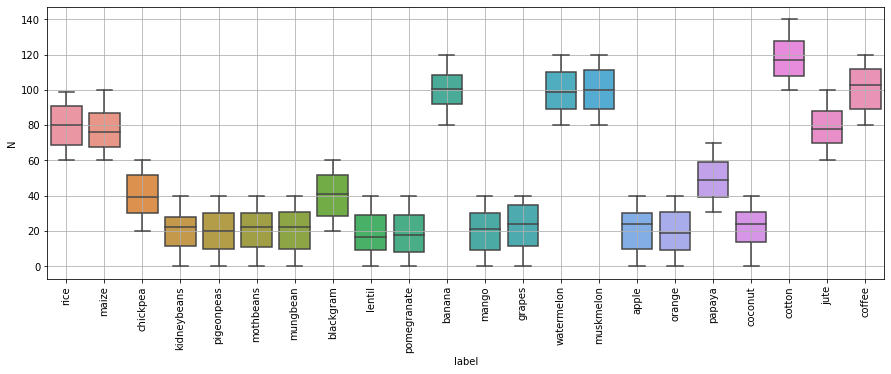

Variable : P


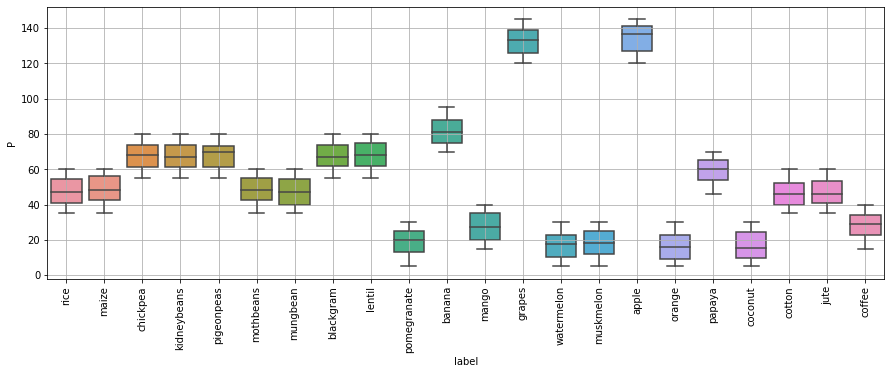

Variable : K


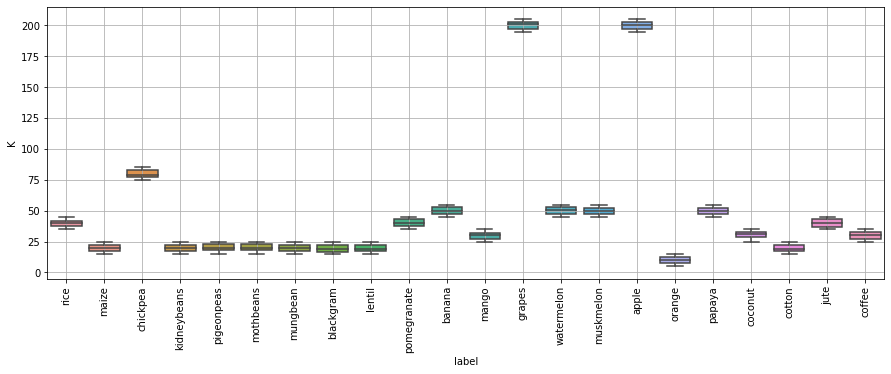

Variable : TEMPERATURE


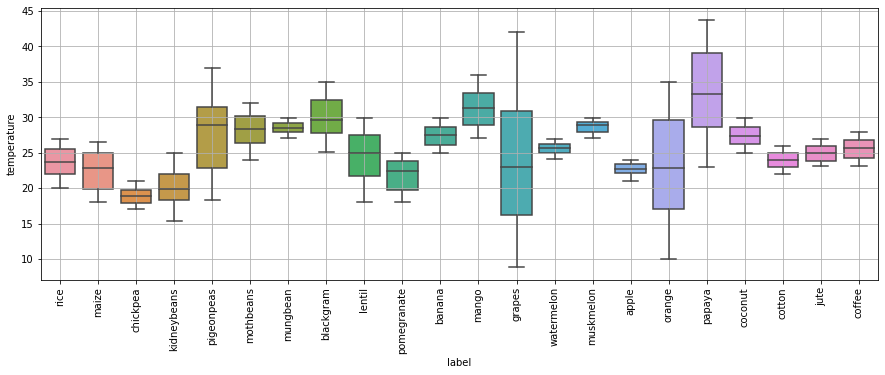

Variable : HUMIDITY


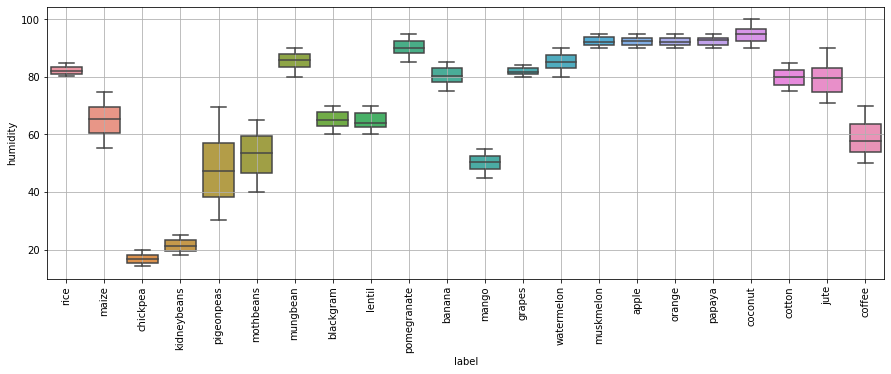

Variable : PH


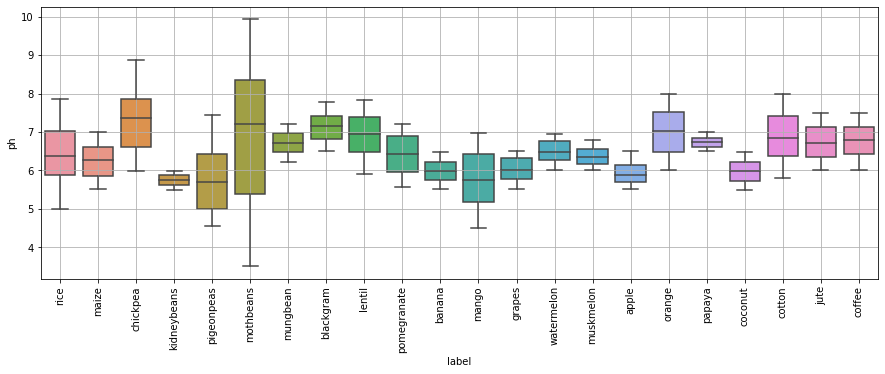

Variable : RAINFALL


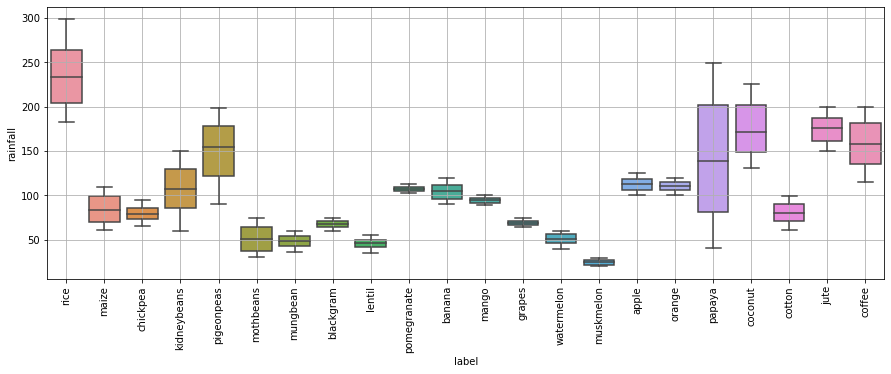

In [34]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

# Crops that can be grown with Temperature greater than 30 degrees

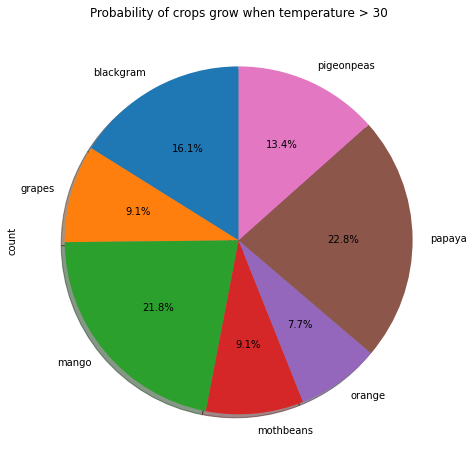

In [35]:
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

# Crops that can be grown with Temperature less than 20 degrees

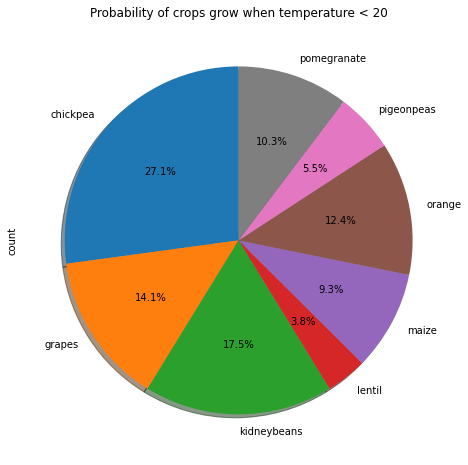

In [41]:
x = pd.DataFrame(pd.crosstab(data.label[data.temperature <20],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature < 20')
plt.show()

# Which crops can grow at higher rainfall .i.e., rainfall > 150mm

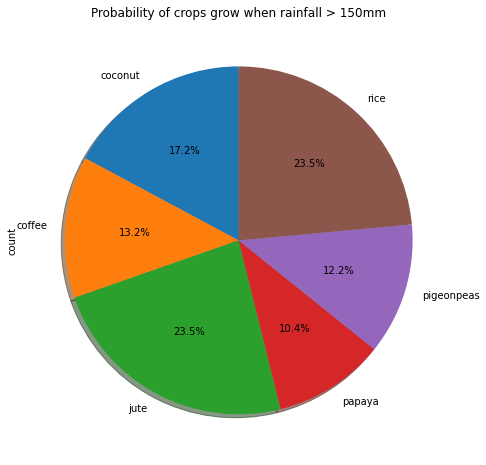

In [43]:
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

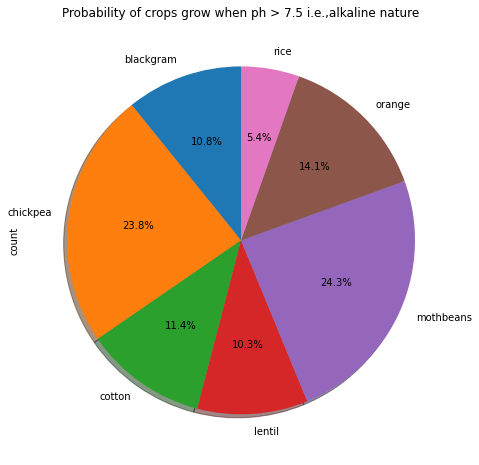

In [44]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

# Data Split into Input and Output

In [45]:
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    20
1    20
2    20
3    20
4    20
Name: Encoded_label, dtype: int32


In [46]:
# Split Data into Train and Test Dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1760, 7), x_test = (440, 7), y_train = (1760,), y_test = (440,)


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

C:\Users\rajeevramesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 



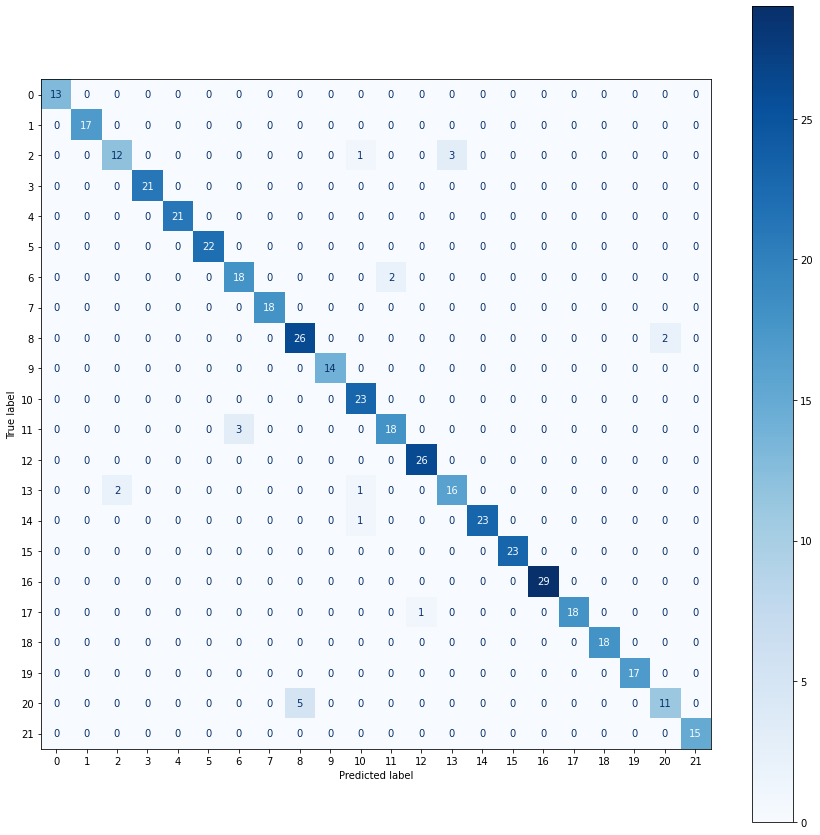

In [50]:
#Initializing the model
logis = LogisticRegression()
pred_logis = logis.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logis,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [51]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_logis))
acc_logis = accuracy_score(y_test,pred_logis)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand

0.9954545454545455

In [54]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [55]:
#selecting parameters using GridSearchCV
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


C:\Users\rajeevramesh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.98636364 0.98920455 0.98977273]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [56]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 20}
0.996590909090909


Confusion Matrix : 



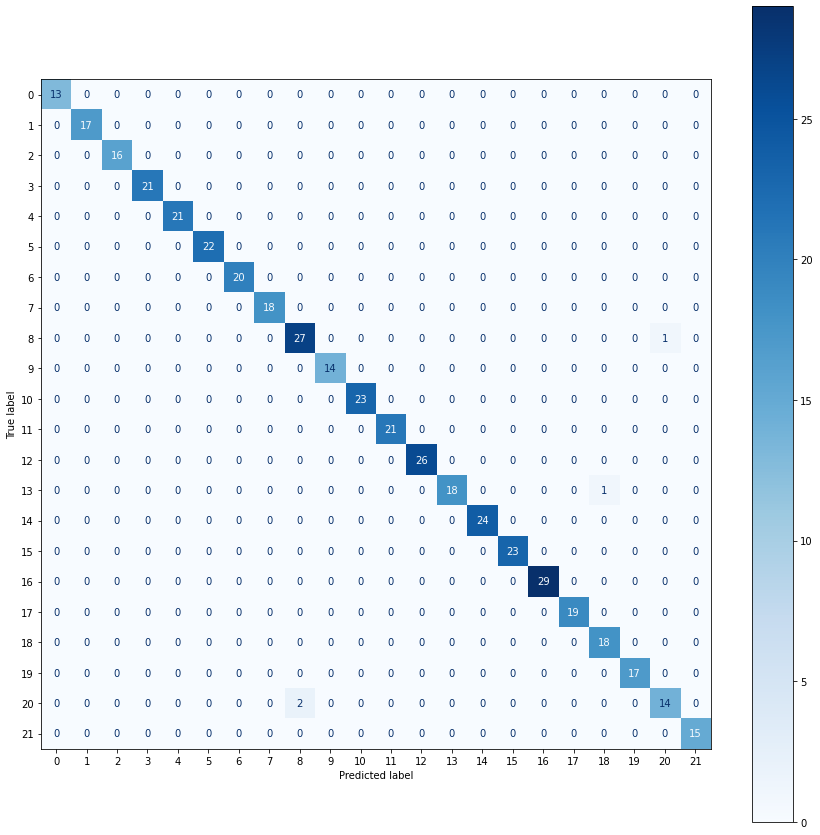

In [57]:
#predicting for test data and plotting confusion matrix
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [58]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_rand))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

# XGBOOST

In [62]:
!pip install xgboost

In [63]:
from xgboost import XGBClassifier

C:\Users\rajeevramesh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix : 



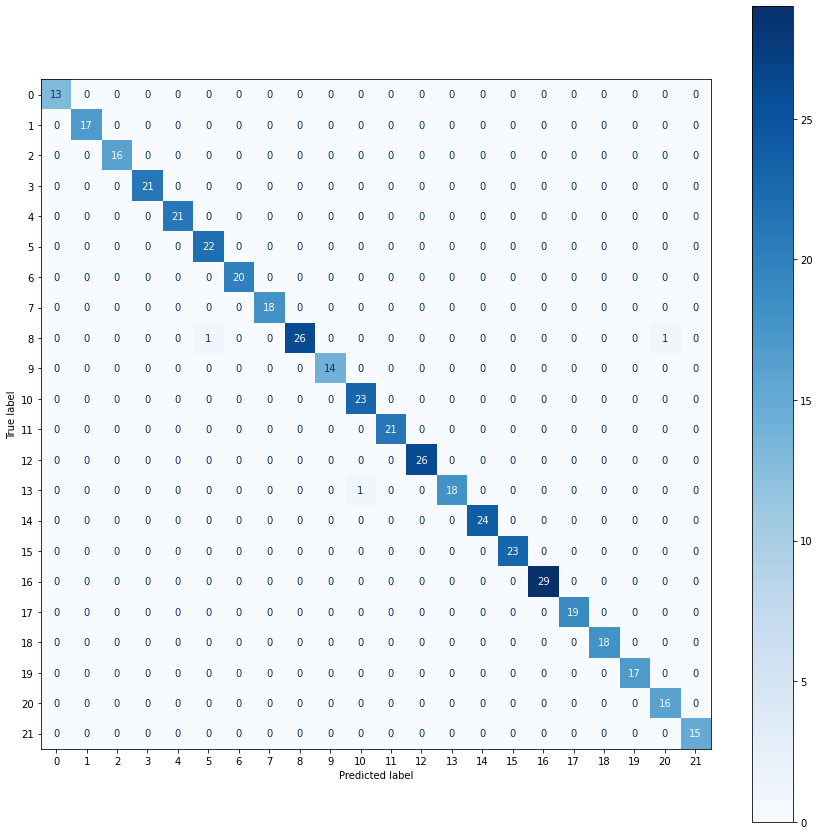

In [64]:
#initializing the model and fitting for train data
xgb = XGBClassifier()
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)
acc_xgb = accuracy_score(y_test,pred_xgb)
#plotting confusion matrix
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(xgb,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [65]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_xgb))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [67]:
#importing pickle file
# Random Forest Final Model
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [68]:
#Test Input

In [69]:
a = [[80,35,40,30,80,7.5,100]]

In [70]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

,predicted_values
label,
apple,0.00
banana,15.00
blackgram,0.00
chickpea,0.00
coconut,0.00
coffee,24.25
cotton,0.00
grapes,0.00
jute,9.58


In [71]:
#Predicting top 5 best suitable crops

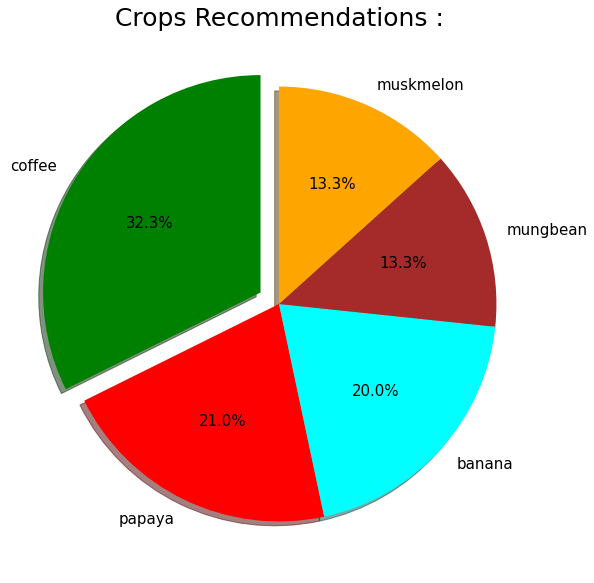

In [72]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])

plt.show()

# 1.Accuracy of the model using Logistic Regression is 95%.
2.Accuracy of the model using Random Forest Classifier is 99%.
3.Accuracy of the model using XGBoost Classifier is 99%.
Random Forest Classifier is used for development of model.